In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [13]:
from SloppyCell.ReactionNetworks import *
from copy import deepcopy
from pandas import *
import numpy as np

In [14]:
genotypes = {}

#genotypes['pp6-18'] = []
#genotypes['pp8-16'] = []
#genotypes['pp12-12'] = []
#genotypes['pp18-6'] = []
genotypes['col_0_LL'] = []
genotypes['col_0_DD'] = []
genotypes['prr79_LL'] = ['cP9_m','cP7_m']
genotypes['prr79_DD'] = ['cP9_m','cP7_m']
genotypes['lhycca1_LL'] = ['cL_m']
genotypes['lhycca1_DD'] = ['cL_m']
genotypes['toc1_LL'] = ['cT_m']
genotypes['toc1_DD'] = ['cT_m']
genotypes['gi_LL'] = ['cG_m']
genotypes['gi_DD'] = ['cG_m']
genes = {'cL_m':'cca1','cP9_m':'prr9','cP7_m':'prr7','cP5_m':'prr5',
         'cT_m':'toc1','cLUX_m':'lux','cG_m':'gi','cE3_m':'elf3','cE4_m':'elf4'}
genes = {"GAPDH3'":"GAPDH3'",'ACT2 155':'ACT2 155', 'ACT2 633':'ACT2 633', "GAPDH5'":"GAPDH5'"}

In [15]:
book = ExcelFile('PhotoPeriodTiMetEdited.xlsx')
book.sheet_names

data = {}
for network in book.sheet_names:
    data[network] =book.parse(network)
nuclei_number_gFW = 25.0e6
uncertainty = 0.35
displacement=0

network_data={}
for network in data.keys():
    if network not in genotypes.keys():
        continue

    gene_dict = {}
    for gene in genes.keys():
        try:
            if gene in genotypes[network]:
                continue
        except:
            pass
        time_dict={}
        for zt in range(0,len(data[network][genes[gene]]),2):

            if not (np.isnan(data[network][genes[gene]][zt]) or np.isnan(data[network][genes[gene]][zt+1])):
                points  = np.log(np.array([data[network][genes[gene]][zt],
                                           data[network][genes[gene]][zt+1]])/nuclei_number_gFW)
                data_mean=np.mean(points)
                data_var=np.std(points)

                if math.isnan(data_var):
                    data_var = 0.35


            time_dict[zt+displacement] = (data_mean,data_var)
        gene_dict['log_'+gene]=time_dict
    network_data[network]=gene_dict

NameError: name 'data_mean' is not defined

In [15]:
network_data

{}

In [22]:
P2011_entre = IO.from_SBML_file('models/col_0.xml', 'P2011_entre', duplicate_rxn_params=True)
P2011 = P2011_entre.copy('P2011')
params = P2011.GetParameters()
days_entre = 20
flag=1
light = 'light'
for i in range(0,24*(days_entre)+12,12):
            if flag:
                P2011_entre.add_event('on_'+str(i), 'gt(time,'+str(i)+')', {light: 1.})
                flag = 0
            else:
                P2011_entre.add_event('off_'+str(i), 'gt(time,'+str(i)+')', {light: 0.})
                flag = 1

P2011_entre.compile()
traj = Dynamics.integrate(P2011_entre,(0,24*19), params=params)
P2011.set_var_ics(traj.get_var_vals_index(-1))

days_entre = 1
flag=1
light = 'light'
for i in range(0,24*(days_entre)+12,12):
            if flag:
                P2011.add_event('on_'+str(i), 'gt(time,'+str(i)+')', {light: 1.})
                flag = 0
            else:
                P2011.add_event('off_'+str(i), 'gt(time,'+str(i)+')', {light: 0.})
                flag = 1
P2011.compile()
params = P2011.GetParameters()

IOError: [Errno 2] No such file or directory: 'models/col_0.xml'

In [ ]:
isnan(nan)

In [16]:
import seaborn
import scipy.stats as stats
stats.probplot(measurements, dist="norm", plot=pylab)

NameError: name 'measurements' is not defined

In [24]:
book.parse(network)

,ZT,ACT2 155,ACT2 633,GAPDH3',GAPDH5',lhy,cca1,prr9,prr7,prr5,toc1,lux,gi,elf3,elf4
0,0,2.454787e+10,2.212110e+10,3.492345e+10,2.351405e+10,1.481863e+10,3.863269e+09,1.745221e+07,3.377031e+08,7.545843e+06,7.014155e+07,3.618855e+07,8.466363e+06,1.536835e+08,4.139012e+06
1,0,3.573986e+10,3.143120e+10,NaN,3.396888e+10,1.365462e+10,3.522745e+09,1.117758e+07,2.408016e+08,8.601020e+06,4.029051e+07,2.648567e+07,1.233461e+07,1.142735e+08,2.115848e+06
2,2,1.063792e+10,6.839529e+09,1.817825e+10,1.450337e+10,4.591887e+09,1.145111e+09,6.044817e+08,5.962780e+08,8.259011e+06,2.823841e+07,1.994372e+07,3.310658e+08,2.201844e+07,2.406344e+07
3,2,2.812074e+10,3.163024e+10,2.807234e+10,3.640084e+10,1.364137e+10,2.459838e+09,1.115178e+09,1.469373e+09,9.408969e+06,3.249959e+07,3.873846e+07,7.569476e+08,4.441901e+07,4.999534e+07
4,4,1.628040e+10,1.103160e+10,2.774032e+10,3.611647e+10,2.334175e+09,6.832904e+08,1.057945e+09,2.493708e+09,1.355430e+08,6.136543e+07,5.700608e+07,1.009255e+09,7.865975e+07,1.492168e+08
5,4,1.491788e+10,1.420261e+10,2.800556e+10,3.443640e+10,1.806304e+09,5.758727e+08,9.348230e+08,2.332483e+09,9.890165e+07,5.368393e+07,4.587392e+07,7.608603e+08,6.665264e+07,1.011244e+08
6,6,9.273831e+09,8.863074e+09,4.411515e+10,2.966783e+10,1.587472e+08,9.729923e+07,4.682236e+08,2.245988e+09,2.419439e+09,5.217651e+08,5.148389e+08,2.376422e+09,2.038673e+08,1.184615e+09
7,6,4.671479e+09,4.499972e+09,NaN,9.400193e+09,1.708689e+08,1.267344e+08,6.058920e+08,2.506681e+09,2.044989e+09,4.341598e+08,4.645747e+08,1.757408e+09,3.136555e+08,5.957020e+08
8,8,1.261458e+10,1.089213e+10,3.581461e+10,2.134009e+10,4.939799e+07,1.760204e+07,3.506446e+07,1.946342e+09,1.985036e+09,2.418951e+09,2.059233e+09,3.126186e+09,6.676425e+08,9.947255e+09
9,8,1.588242e+10,1.428909e+10,4.845131e+10,3.009340e+10,6.451447e+07,1.674779e+07,3.757787e+07,2.496904e+09,2.480824e+09,2.814241e+09,2.444739e+09,4.511601e+09,8.116981e+08,1.287222e+10


(15, 30)

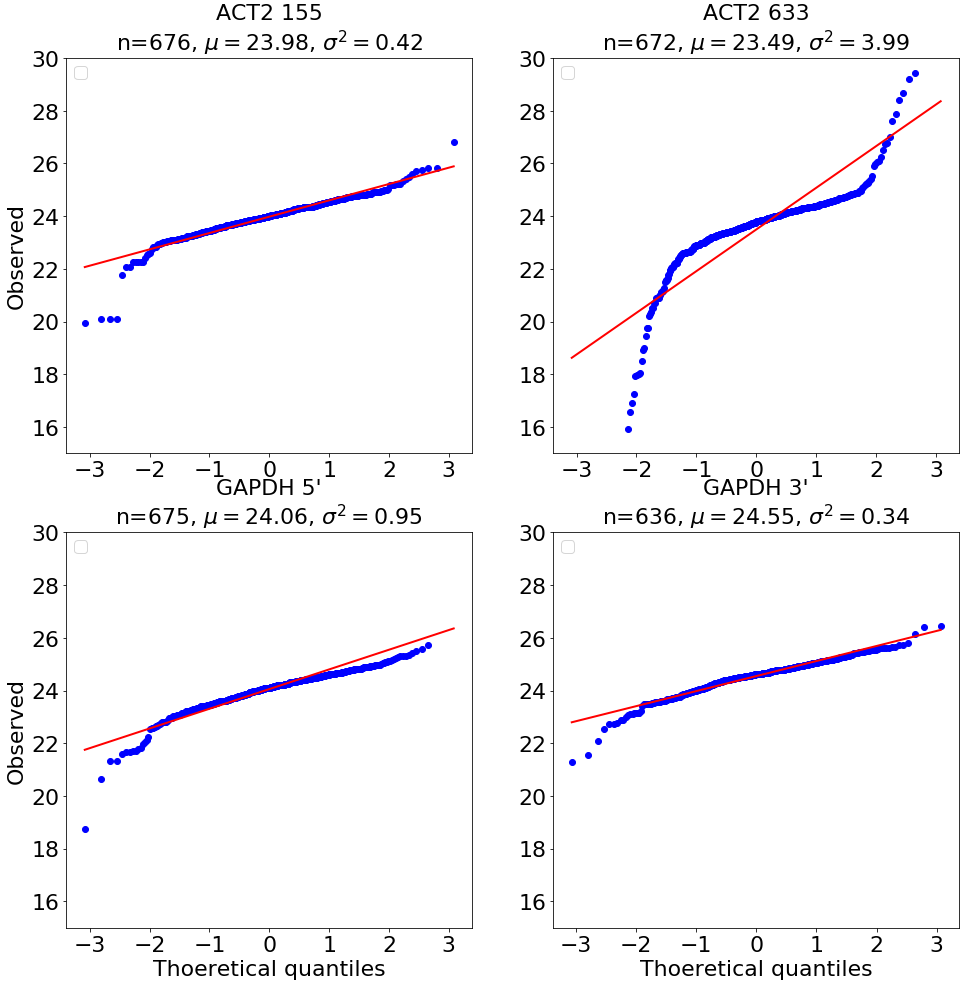

In [17]:
figure(figsize=(16,16))
variance = []
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)['ACT2 155']:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
                
variance.append(var(x))
subplot(221)
#hist(x, bins=30, normed=True, label="ACT2 155\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 155\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
xlabel('')
x=[]
n = 0
for network in book.sheet_names:
     for i in book.parse(network)['ACT2 633']:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
                
#variance.append(var(x))
subplot(222)
#hist(x, bins=30, normed=True, label="ACT2 633\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 633\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
#ylabel('Frequncy', fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
xlabel('')
ylabel('')
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH5'"]:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
                
variance.append(var(x))
subplot(223)
#hist(x, bins=30, normed=True, label="GAPDH 5'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 5'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH3'"]:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
variance.append(var(x))               
subplot(224)
#hist(x, bins=30, normed=True, label="GAPDH 3'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 3'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
xticks(fontsize=22)
ylabel('')
yticks(fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
#ylabel('Frequncy', fontsize=22)
#savefig('residuals_flis.pdf', format='pdf', dpi=300)

(15, 30)

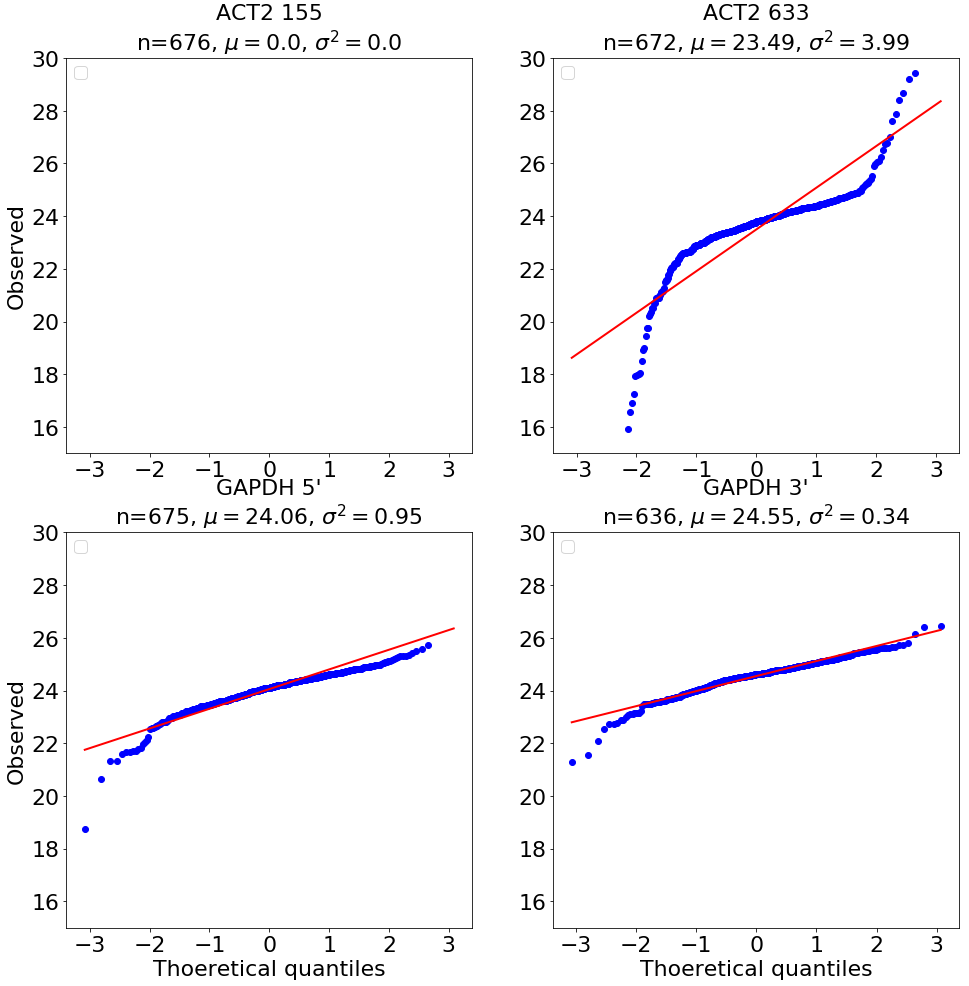

In [18]:
figure(figsize=(16,16))
variance = []
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)['ACT2 155']:
            if isnan(i):
                continue
            else:
                x.append(log(i)/25e6)
                n+=1
                
variance.append(var(x))
subplot(221)
#hist(x, bins=30, normed=True, label="ACT2 155\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 155\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
xlabel('')
x=[]
n = 0
for network in book.sheet_names:
     for i in book.parse(network)['ACT2 633']:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
                
#variance.append(var(x))
subplot(222)
#hist(x, bins=30, normed=True, label="ACT2 633\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 633\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
#ylabel('Frequncy', fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
xlabel('')
ylabel('')
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH5'"]:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
                
variance.append(var(x))
subplot(223)
#hist(x, bins=30, normed=True, label="GAPDH 5'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 5'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH3'"]:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
variance.append(var(x))               
subplot(224)
#hist(x, bins=30, normed=True, label="GAPDH 3'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 3'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
xticks(fontsize=22)
ylabel('')
yticks(fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
#ylabel('Frequncy', fontsize=22)
#savefig('residuals_flis.pdf', format='pdf', dpi=300)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(15, 30)

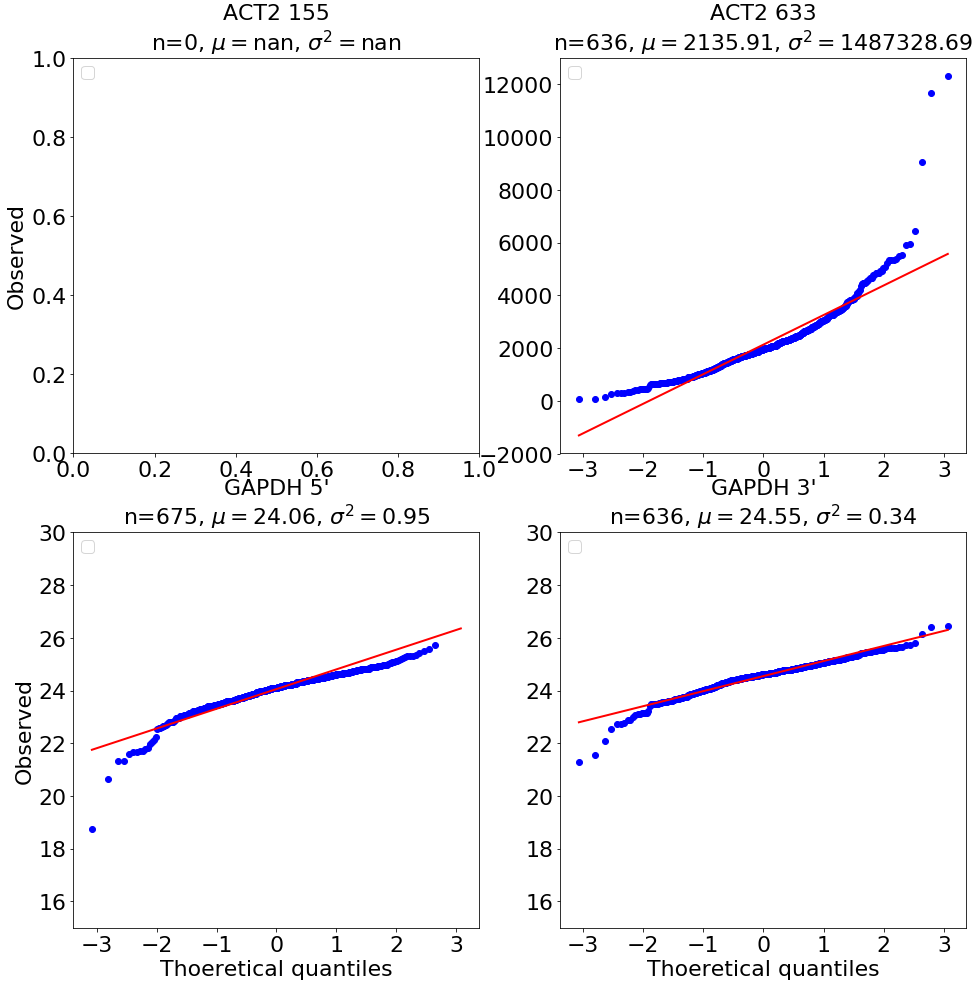

In [19]:
figure(figsize=(16,16))
variance = []
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH5'"]:
            if isnan(i):
                continue
            else:
                if log(i) < 0.6:
                    print i
                    x.append((i))
                    n+=1
                
variance.append(var(x))
subplot(221)
#hist(x, bins=30, normed=True, label="ACT2 155\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 155\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(15,30)
xlabel('')

x=[]
n = 0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH3'"]:
            if isnan(i):
                continue
            else:
                x.append((i/25e6))
                n+=1
                
#variance.append(var(x))
subplot(222)
#hist(x, bins=30, normed=True, label="ACT2 633\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 633\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
#ylabel('Frequncy', fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(15,30)
xlabel('')
ylabel('')
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH5'"]:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
                
variance.append(var(x))
subplot(223)
#hist(x, bins=30, normed=True, label="GAPDH 5'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 5'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH3'"]:
            if isnan(i):
                continue
            else:
                x.append(log(i))
                n+=1
variance.append(var(x))               
subplot(224)
#hist(x, bins=30, normed=True, label="GAPDH 3'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 3'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(x),2))+', $\sigma^2=$'+str(round(var(x),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
xticks(fontsize=22)
ylabel('')
yticks(fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(15,30)
#ylabel('Frequncy', fontsize=22)
#savefig('residuals_flis.pdf', format='pdf', dpi=300)

In [20]:
from scipy.stats import mstats

In [22]:
logx = []
for network in book.sheet_names:
     for i in book.parse(network)["ACT2 155"]:
            if isnan(i):
                continue
            else:
                if log(i) > 30:
                    continue
                else:
                    logx.append(log(i/25e6))
                    x.append(i/25e6)
                    n+=1
print mean(x)

658.0948532181151


NormaltestResult(statistic=428.1541035417709, pvalue=1.0654123182899775e-93)
log NormaltestResult(statistic=8.592231592898493, pvalue=0.013621364544623095)
NormaltestResult(statistic=323.83471929779523, pvalue=4.788331178183957e-71)
log NormaltestResult(statistic=1.0694644157779463, pvalue=0.5858261487621781)


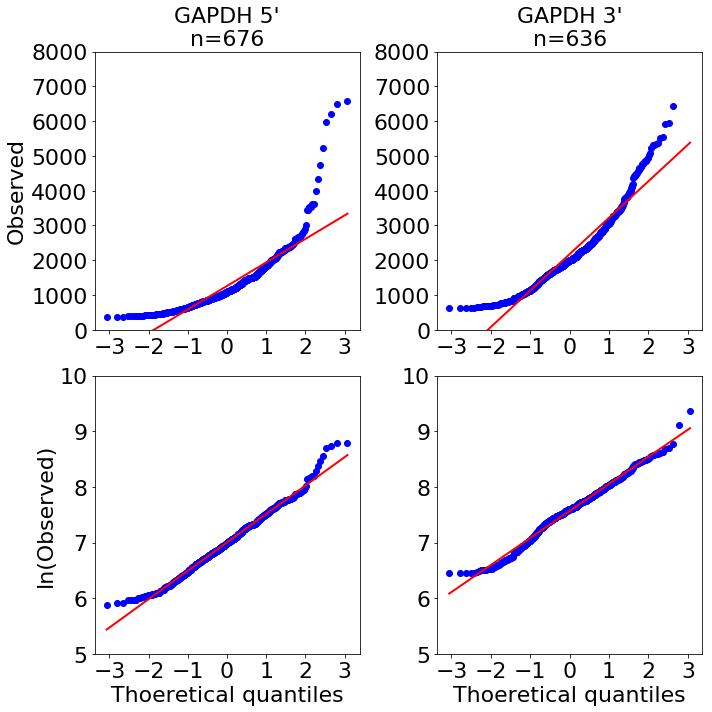

In [36]:
figure(figsize=(10,10))
logx=[]
x=[]
n=0

for network in book.sheet_names:
     for i in book.parse(network)["ACT2 155"]:
            if isnan(i):
                continue
            else:
                if log(i) > 30:
                    continue
                else:
                    logx.append(log(i/25e6))
                    x.append(i/25e6)
                    n+=1


subplot(221)
#hist(x, bins=30, normed=True, label="GAPDH 5'\n"+'n='+str(n))
stats.probplot(sort(x)[20:-1], dist="norm", plot=pylab)
#boxplot(log(x))
print mstats.normaltest(sort(x)[20:-1])
print 'log', mstats.normaltest(sort(logx)[20:-1])
title("GAPDH 5'\n"+'n='+str(n), fontsize=22)
ylabel('Observed', fontsize=22)
xlabel('')
xticks(fontsize=22)
yticks(fontsize=22)
ylim(0,8e3)


subplot(223)
stats.probplot(sort(logx)[20:-1], dist="norm", plot=pylab)
xticks(fontsize=22)
yticks(fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
ylabel('ln(Observed)', fontsize=22)
#ylim(exp(15),exp(30))
xlabel('Thoeretical quantiles', fontsize=22)
title('')
#ylim(18,28)
ylim(5,10)
x=[]
logx=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH3'"]:
            if isnan(i):
                continue
            else:
                logx.append(log(i/25e6))
                x.append(i/25e6)
                n+=1
variance.append(var(x))


subplot(222)
#hist(x, bins=30, normed=True, label="GAPDH 3'\n"+'n='+str(n))
stats.probplot(sort(x)[20:-1], dist="norm", plot=pylab)
print mstats.normaltest(sort(x)[20:-1])
title("GAPDH 3'\n"+'n='+str(n), fontsize=22)
ylabel('')
xlabel('')
xticks(fontsize=22)
yticks(fontsize=22)
ylim(0,8e3)




subplot(224)
stats.probplot(sort(logx)[20:-1], dist="norm", plot=pylab)
print 'log',mstats.normaltest(sort(logx)[20:-1])

title('')
#title("GAPDH 3'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(logx),2))+', $\sigma^2=$'+str(round(var(logx),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
xticks(fontsize=22)
ylabel('')
yticks(fontsize=22)
#ylim(18,28)
ylim(5,10)
tight_layout()
#ylabel('Frequncy', fontsize=22)
savefig('residuals_flis.svg', format='svg', dpi=600, transparent=True)

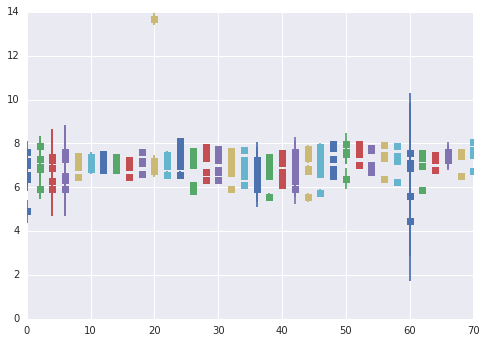

In [50]:
for g in network_data.keys():
    for k in network_data[g]["log_GAPDH5'"].keys():
        errorbar(k,network_data[g]["log_GAPDH5'"][k][0],yerr=network_data['col_0_LL']["log_GAPDH5'"][k][1],fmt='s')
    

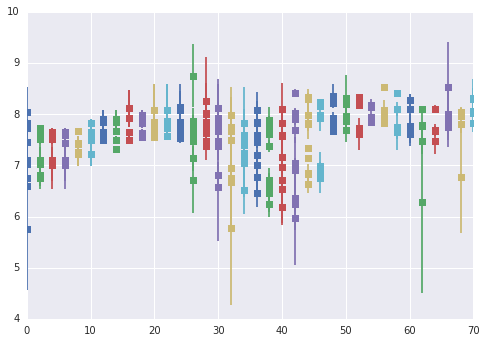

In [60]:
for g in network_data.keys():
    for k in network_data[g]["log_GAPDH3'"].keys():
        errorbar(k,network_data[g]["log_GAPDH3'"][k][0],yerr=network_data[g]["log_GAPDH3'"][k][1],fmt='s')

In [54]:
network_data['col_0_LL']

{'log_ACT2 155': {0: (6.8960605571287736, 0.82174898394384677),
  2: (6.7840165222873559, 0.17062844889451423),
  4: (4.6636883247640712, 1.5884116277403906),
  6: (4.6636883247640712, 1.5884116277403906),
  8: (6.4569545530187415, 0.052463343324656186),
  10: (6.4681618626989845, 0.34441700870112113),
  12: (6.8328891994408671, 0.18442848168359083),
  14: (6.9613350490535524, 0.10623044656593761),
  16: (7.0864274633080964, 0.14593080765835609),
  18: (7.0864274633080964, 0.14593080765835609),
  20: (7.3003889849436838, 0.024176233660574642),
  22: (6.5079079523589369, 0.53617984853997225),
  24: (7.1540265744859921, 0.20803920393470232),
  26: (6.9960128620682234, 0.083596395730348938),
  28: (6.7242475137824087, 0.21146768674281313),
  30: (6.4990283400016722, 0.20959750147382872),
  32: (6.2769071782638957, 0.08900816995443829),
  34: (6.7826583036998391, 0.19918091236482027),
  36: (6.6338743345098026, 0.28664484184505667),
  38: (6.960038042046337, 0.15097332303077726),
  40: (6.

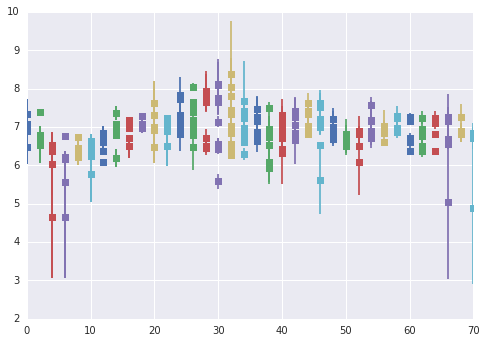

In [58]:
for g in network_data.keys():
    for k in network_data[g]["log_ACT2 155"].keys():
        errorbar(k,network_data[g]["log_ACT2 155"][k][0],yerr=network_data[g]["log_ACT2 155"][k][1],fmt='s')

In [ ]:
x =[]
for g in network_data.keys():
    for k in network_data[g]["log_ACT2 633"].keys():
        #errorbar(k,network_data[g]["log_ACT2 633"][k][0],yerr=network_data[g]["log_ACT2 633"][k][1],fmt='s')
        x.append(x)
stats.probplot(x, dist='norm', plot='pyplot')

AttributeError: 'module' object has no attribute 'probplot'

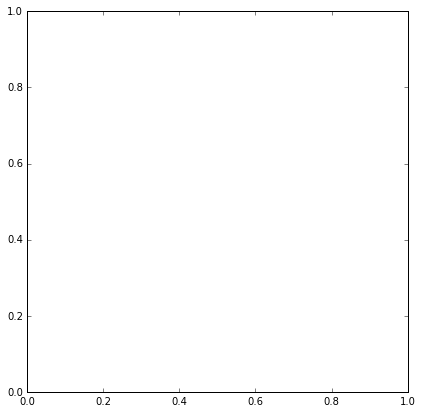

In [14]:
figure(figsize=(15,15))
logx=[]
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH5'"]:
            if isnan(i):
                continue
            else:
                if log(i) > 30:
                    continue
                else:
                    logx.append(log(i))
                    x.append(i)
                    n+=1

subplot(221)
#hist(x, bins=30, normed=True, label="GAPDH 5'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 5'\n"+'n='+str(n), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
subplot(223)
stats.probplot(logx, dist="norm", plot=pylab)

#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(exp(15),exp(30))
ylim(18,28)
x=[]
logx=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH3'"]:
            if isnan(i):
                continue
            else:
                logx.append(log(i))
                x.append(i)
                n+=1
variance.append(var(x))               
subplot(222)
#hist(x, bins=30, normed=True, label="GAPDH 3'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 3'\n"+'n='+str(n), fontsize=22)
ylabel('')
xlabel('')
subplot(224)
stats.probplot(logx, dist="norm", plot=pylab)
title("GAPDH 3'\n"+'n='+str(n)+', $\mu=$'+str(round(mean(logx),2))+', $\sigma^2=$'+str(round(var(logx),2)), fontsize=22)
xlabel('Thoeretical quantiles', fontsize=22)
xticks(fontsize=22)
ylabel('')
yticks(fontsize=22)
legend(loc='upper left', fontsize=16)
ylim(18,28)
#ylabel('Frequncy', fontsize=22)
#savefig('images/residuals_flis.pdf', format='pdf', dpi=300)

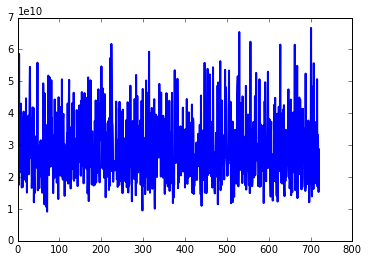

In [15]:
t = linspace(0,24*30,1000)
y = mean(logx)+0.007*sin(2*pi/24*t)+random.normal(scale=0.34, size=len(t))
plot(t,exp(y))


(array([ 137.,  300.,  246.,  172.,   72.,   45.,   15.,   11.,    0.,    2.]),
 array([  1.95114252e+10,   3.12114534e+10,   4.29114816e+10,
          5.46115098e+10,   6.63115379e+10,   7.80115661e+10,
          8.97115943e+10,   1.01411622e+11,   1.13111651e+11,
          1.24811679e+11,   1.36511707e+11]),
 <a list of 10 Patch objects>)

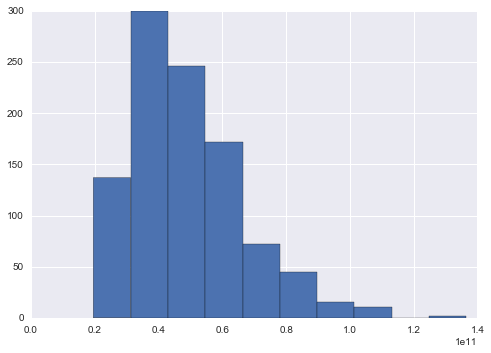

In [105]:
hist(exp(y))


In [149]:
concatenate((y,y))

array([ 24.42115312,  24.94470356,  23.96058945,  24.02537973,
        25.20539372,  23.96336502,  25.86110281,  23.88482802,
        25.40408523,  24.21109311,  24.21753542,  23.75257195,
        24.42766975,  23.80971793,  25.1199722 ,  23.9054642 ,
        24.70702139,  24.47021263,  24.92310109,  25.53654104,
        25.91135479,  23.94846874,  24.67063313,  24.41948693,
        25.54353621,  25.13925642,  25.10399153,  25.3970388 ,
        23.5322883 ,  24.83785854,  24.07726857,  24.36976352,
        23.80223391,  24.70560318,  24.67667595,  25.45518143,
        24.00491407,  24.630382  ,  24.74027639,  22.78744281,
        25.18278483,  24.47539064,  24.2701861 ,  24.7076085 ,
        24.00188273,  24.48265019,  25.29660466,  25.66686443,
        24.94901911,  23.31254431,  25.05341588,  23.63242614,
        24.60944898,  23.99967513,  25.08383256,  23.82149286,
        23.3389405 ,  22.35024648,  23.9589275 ,  25.47600977,
        25.18155412,  24.07962294,  22.6117982 ,  23.92

AttributeError: 'module' object has no attribute 'probplot'

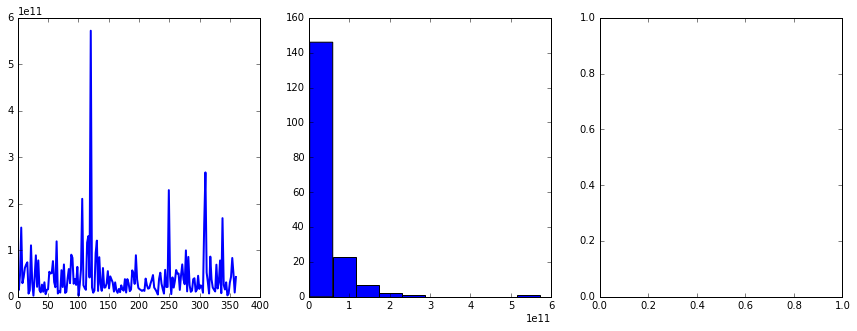

In [16]:
figure(figsize=(20,5))
timesieries = 5
t = linspace(0,24*3*timesieries,24*3/2*timesieries)
y = mean(logx)+random.normal(scale=0.9, size=len(t))
subplot(1,4,1)
plot(t,exp(y))
subplot(1,4,2)
hist(exp(y))
subplot(1,4,3)
stats.probplot(log(exp(y)), dist="norm", plot=pylab)
subplot(1,4,4)
stats.probplot(exp(y), dist="norm", plot=pylab)
title('a')

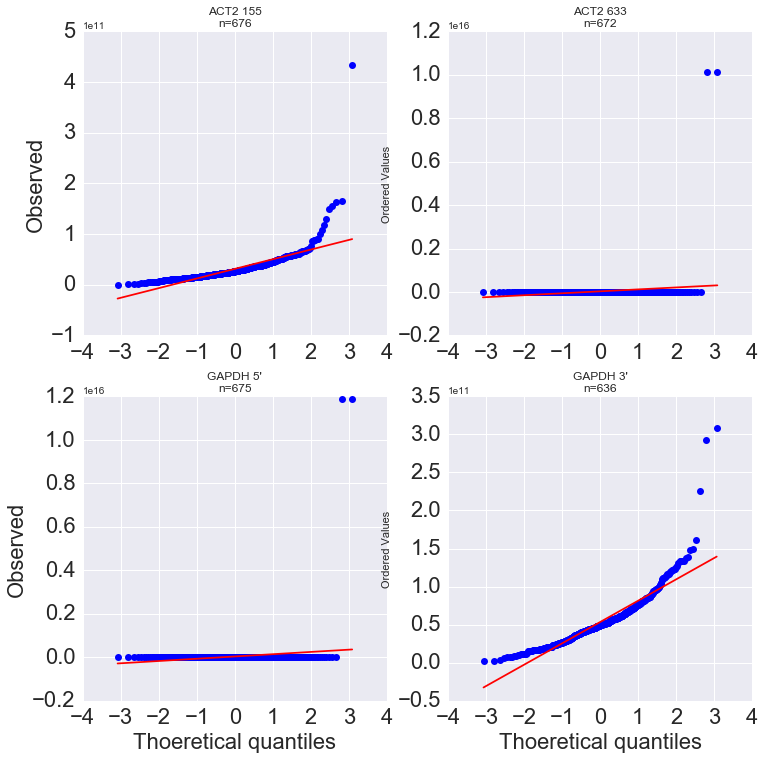

In [115]:
figure(figsize=(12,12))
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)['ACT2 155']:
            if isnan(i):
                continue
            else:
                x.append((i))
                n+=1
                
subplot(221)
#hist(x, bins=30, normed=True, label="ACT2 155\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 155\n"+'n='+str(n))
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(0,0.9)
xlabel('')
x=[]
n = 0
for network in book.sheet_names:
     for i in book.parse(network)['ACT2 633']:
            if isnan(i):
                continue
            else:
                x.append((i))
                n+=1
                
subplot(222)
#hist(x, bins=30, normed=True, label="ACT2 633\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("ACT2 633\n"+'n='+str(n))
xticks(fontsize=22)
yticks(fontsize=22)
#ylabel('Frequncy', fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(0,0.9)
xlabel('')
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH5'"]:
            if isnan(i):
                continue
            else:
                x.append((i))
                n+=1
                
subplot(223)
#hist(x, bins=30, normed=True, label="GAPDH 5'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 5'\n"+'n='+str(n))
xlabel('Thoeretical quantiles', fontsize=22)
#xlabel('ln(Copies g/Fw)', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
ylabel('Observed', fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(0,0.9)
x=[]
n=0
for network in book.sheet_names:
     for i in book.parse(network)["GAPDH3'"]:
            if isnan(i):
                continue
            else:
                x.append((i))
                n+=1
                
subplot(224)
#hist(x, bins=30, normed=True, label="GAPDH 3'\n"+'n='+str(n))
stats.probplot(x, dist="norm", plot=pylab)
title("GAPDH 3'\n"+'n='+str(n))
xlabel('Thoeretical quantiles', fontsize=22)
xticks(fontsize=22)
yticks(fontsize=22)
legend(loc='upper left', fontsize=16)
#ylim(0,0.9)
#ylabel('Frequncy', fontsize=22)


In [32]:
params = Utility.load('../remote_work/Fittings/FullData_001_sigma_period/params_21.bp')

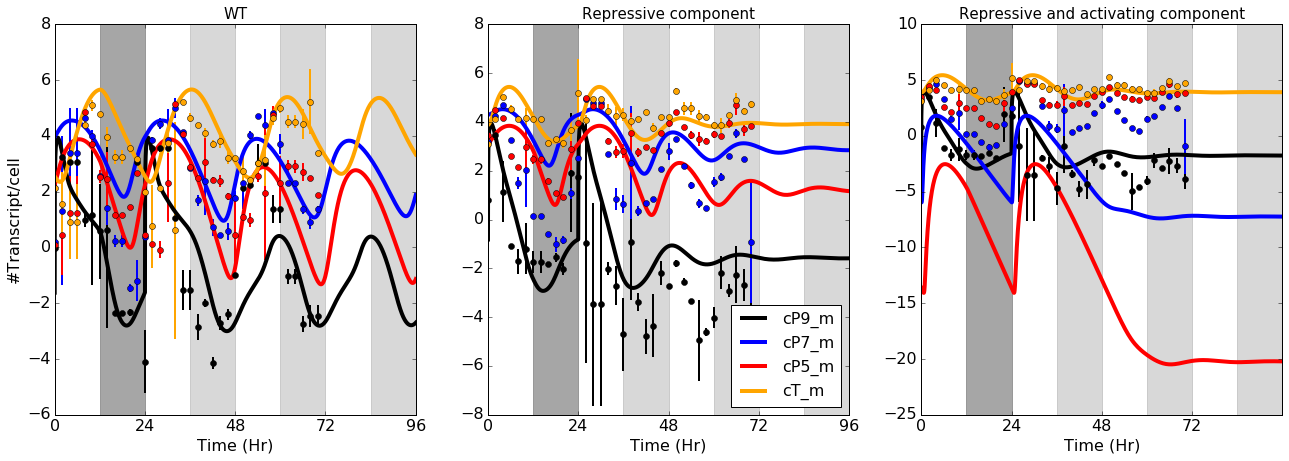

In [33]:
figure(figsize=(22,7))
subplot(131)

traj = Dynamics.integrate(P2011_entre,(0,24*20), params=params)
P2011.set_var_ics(traj.get_var_vals_index(-1))
traj = Dynamics.integrate(P2011,(0,24*7), params=params)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['col_0_LL']['log_cP9_m'].keys()),
         array(network_data['col_0_LL']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['col_0_LL']['log_cP7_m'].keys()),
         array(network_data['col_0_LL']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['col_0_LL']['log_cP5_m'].keys()),
         array(network_data['col_0_LL']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['col_0_LL']['log_cT_m'].keys()),
         array(network_data['col_0_LL']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')

axvspan(12,24, color='grey', alpha=0.7)
for p in range(1,7,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*7)
xticks(range(0,24*7,24), fontsize=16)
#legend(loc='upper right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
ylabel('#Transcript/cell', fontsize=16)
xlim(0,24*4)
title('WT', fontsize=15)


subplot(132)
lhycca1 = deepcopy(params)
lhycca1.setByKey('cl_mut',0)
traj = Dynamics.integrate(P2011_entre,(0,24*20), params=lhycca1)
P2011.set_var_ics(traj.get_var_vals_index(-1))

traj = Dynamics.integrate(P2011,(0,24*7), params=lhycca1)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['lhycca1_LL']['log_cP9_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['lhycca1_LL']['log_cP7_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['lhycca1_LL']['log_cP5_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['lhycca1_LL']['log_cT_m'].keys()),
         array(network_data['lhycca1_LL']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')


axvspan(12,24, color='grey', alpha=0.7)

for p in range(1,7,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*7)
xticks(range(0,24*7,24), fontsize=16)
xlim(0,24*4)
legend(loc='lower right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
#ylabel('#Transcript/cell', fontsize=16)

title('Repressive component', fontsize=15)



subplot(133)
lhycca1.setByKey('cl_mut',1)
lhycca1.setByKey('p1',0)
lhycca1.setByKey('p2',0)
traj = Dynamics.integrate(P2011_entre,(0,24*20), params=lhycca1)
P2011.set_var_ics(traj.get_var_vals_index(-1))
traj = Dynamics.integrate(P2011,(0,24*7), params=lhycca1)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['lhycca1_LL']['log_cP9_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['lhycca1_LL']['log_cP7_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['lhycca1_LL']['log_cP5_m'].keys()),
         array(network_data['lhycca1_LL']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['lhycca1_LL']['log_cT_m'].keys()),
         array(network_data['lhycca1_LL']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_LL']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')


axvspan(12,24, color='grey', alpha=0.7)
for p in range(1,4,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*4)
xticks(range(0,24*4,24), fontsize=16)
#legend(loc='upper right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
#ylabel('#Transcript/cell', fontsize=16)

title('Repressive and activating component', fontsize=15)

savefig('images/P2011_cL_m_and_cT_m.pdf', format='pdf', dpi=300)

In [36]:
P2011_entre = IO.from_SBML_file('models/col_0.xml', 'P2011_entre', duplicate_rxn_params=True)
P2011 = P2011_entre.copy('P2011')
days_entre = 20
flag=1
light = 'light'
for i in range(0,24*(days_entre)+12,12):
            if flag:
                P2011_entre.add_event('on_'+str(i), 'gt(time,'+str(i)+')', {light: 1.})
                flag = 0
            else:
                P2011_entre.add_event('off_'+str(i), 'gt(time,'+str(i)+')', {light: 0.})
                flag = 1

P2011_entre.compile()
traj = Dynamics.integrate(P2011_entre,(0,24*19), params=params)
P2011.set_var_ics(traj.get_var_vals_index(-1))

days_entre = 1
flag=1
light = 'light'
for i in range(0,24*(days_entre),12):
            if flag:
                P2011.add_event('on_'+str(i), 'gt(time,'+str(i)+')', {light: 1.})
                flag = 0
            else:
                P2011.add_event('off_'+str(i), 'gt(time,'+str(i)+')', {light: 0.})
                flag = 1
P2011.compile()

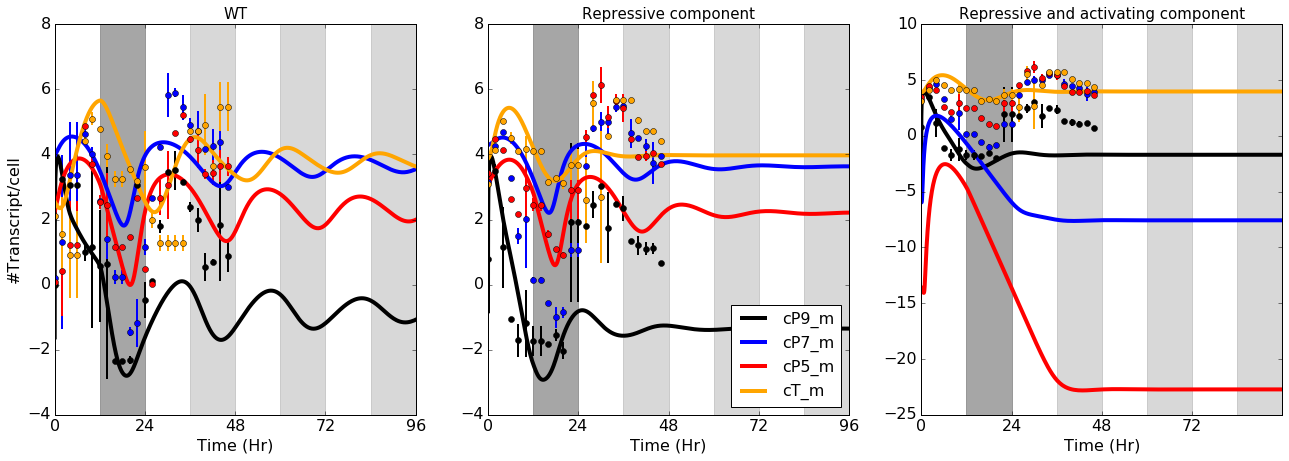

In [37]:
figure(figsize=(22,7))
subplot(131)

traj = Dynamics.integrate(P2011_entre,(0,24*20), params=params)
P2011.set_var_ics(traj.get_var_vals_index(-1))
traj = Dynamics.integrate(P2011,(0,24*7), params=params)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['col_0_DD']['log_cP9_m'].keys()),
         array(network_data['col_0_DD']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['col_0_DD']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['col_0_DD']['log_cP7_m'].keys()),
         array(network_data['col_0_DD']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['col_0_DD']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['col_0_DD']['log_cP5_m'].keys()),
         array(network_data['col_0_DD']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['col_0_DD']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['col_0_DD']['log_cT_m'].keys()),
         array(network_data['col_0_DD']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['col_0_DD']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')

axvspan(12,24, color='grey', alpha=0.7)
for p in range(1,7,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*7)
xticks(range(0,24*7,24), fontsize=16)
#legend(loc='upper right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
ylabel('#Transcript/cell', fontsize=16)
xlim(0,24*4)
title('WT', fontsize=15)


subplot(132)
lhycca1 = deepcopy(params)
lhycca1.setByKey('cl_mut',0)
traj = Dynamics.integrate(P2011_entre,(0,24*20), params=lhycca1)
P2011.set_var_ics(traj.get_var_vals_index(-1))

traj = Dynamics.integrate(P2011,(0,24*7), params=lhycca1)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['lhycca1_DD']['log_cP9_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['lhycca1_DD']['log_cP7_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['lhycca1_DD']['log_cP5_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['lhycca1_DD']['log_cT_m'].keys()),
         array(network_data['lhycca1_DD']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')


axvspan(12,24, color='grey', alpha=0.7)

for p in range(1,7,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*7)
xticks(range(0,24*7,24), fontsize=16)
xlim(0,24*4)
legend(loc='lower right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
#ylabel('#Transcript/cell', fontsize=16)

title('Repressive component', fontsize=15)



subplot(133)
lhycca1.setByKey('cl_mut',1)
lhycca1.setByKey('p1',0)
lhycca1.setByKey('p2',0)
traj = Dynamics.integrate(P2011_entre,(0,24*20), params=lhycca1)
P2011.set_var_ics(traj.get_var_vals_index(-1))

traj = Dynamics.integrate(P2011,(0,24*7), params=lhycca1)
plot(traj.timepoints,log(traj.get_var_traj('cP9_m')), 'k', lw=4, label='cP9_m')
plot(traj.timepoints,log(traj.get_var_traj('cP7_m')), 'b', lw=4, label='cP7_m')
plot(traj.timepoints,log(traj.get_var_traj('cP5_m')), 'r', lw=4, label='cP5_m')
plot(traj.timepoints,log(traj.get_var_traj('cT_m')), color='orange', lw=4, label='cT_m')

errorbar(array(network_data['lhycca1_DD']['log_cP9_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP9_m'].values())[:,1], fmt='ko', capsize=0)


errorbar(array(network_data['lhycca1_DD']['log_cP7_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP7_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP7_m'].values())[:,1], fmt='bo', capsize=0)

errorbar(array(network_data['lhycca1_DD']['log_cP5_m'].keys()),
         array(network_data['lhycca1_DD']['log_cP5_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cP5_m'].values())[:,1], fmt='ro', capsize=0)

errorbar(array(network_data['lhycca1_DD']['log_cT_m'].keys()),
         array(network_data['lhycca1_DD']['log_cT_m'].values())[:,0], 
         yerr=array(network_data['lhycca1_DD']['log_cT_m'].values())[:,1], fmt='o', capsize=0, color='orange')


axvspan(12,24, color='grey', alpha=0.7)
for p in range(1,4,1):
    axvspan(24*p+12,24*(p+1), color='grey', alpha=0.3)
#xticks(range(0,24*5,12), fontsize=16)
yticks(fontsize=16)
xlim(0,24*4)
xticks(range(0,24*4,24), fontsize=16)
#legend(loc='upper right', fontsize=16)
xlabel('Time (Hr)', fontsize=16)
#ylabel('#Transcript/cell', fontsize=16)

title('Repressive and activating component', fontsize=15)

savefig('images/P2011_cL_m_and_cT_m.pdf', format='pdf', dpi=300)

In [6]:
genotypes = {}

#genotypes['pp6-18'] = []
#genotypes['pp8-16'] = []
#genotypes['pp12-12'] = []
#genotypes['pp18-6'] = []
genotypes['col_0_LL'] = []
genotypes['col_0_DD'] = []
genotypes['prr79_LL'] = ['cP9_m','cP7_m']
genotypes['prr79_DD'] = ['cP9_m','cP7_m']
genotypes['lhycca1_LL'] = ['cL_m']
genotypes['lhycca1_DD'] = ['cL_m']
genotypes['toc1_LL'] = ['cT_m']
genotypes['toc1_DD'] = ['cT_m']
genotypes['gi_LL'] = ['cG_m']
genotypes['gi_DD'] = ['cG_m']
genes = {'cL_m':'cca1','cP9_m':'prr9','cP7_m':'prr7','cP5_m':'prr5',
         'cT_m':'toc1','cLUX_m':'lux','cG_m':'gi','cE3_m':'elf3','cE4_m':'elf4'}

In [9]:
book = ExcelFile('data/PhotoPeriodTiMetEdited.xlsx')
book.sheet_names

data = {}
for network in book.sheet_names:
    data[network] =book.parse(network)
nuclei_number_gFW = 25.0e6
uncertainty = 0.35
displacement=0

network_data={}
for network in data.keys():
    if network not in genotypes.keys():
        continue

    gene_dict = {}
    for gene in genes.keys():
        try:
            if gene in genotypes[network]:
                continue
        except:
            pass
        time_dict={}
        for zt in range(0,len(data[network][genes[gene]]),2):

            if not (np.isnan(data[network][genes[gene]][zt]) or np.isnan(data[network][genes[gene]][zt+1])):
                points  = np.log(np.array([data[network][genes[gene]][zt],
                                           data[network][genes[gene]][zt+1]])/nuclei_number_gFW)
                data_mean=np.mean(points)
                data_var=np.std(points)

                if math.isnan(data_var):
                    data_var = 0.35


            time_dict[zt+displacement] = (data_mean,data_var)
        gene_dict['log_'+gene]=time_dict
    network_data[network]=gene_dict

In [ ]:
errorbar(array(network_data['col_0_LL']['log_cL_m'].keys()),
         array(network_data['col_0_LL']['log_cL_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cL_m'].values())[:,1], fmt='o', capsize=0)

In [ ]:
errorbar(array(network_data['col_0_LL']['log_cP9_m'].keys())-24*9,
         array(network_data['col_0_LL']['log_cP9_m'].values())[:,0], 
         yerr=array(network_data['col_0_LL']['log_cP9_m'].values())[:,1], fmt='o', capsize=0)